**Exercise 1**

image.png

The Dantzig-Fulkerson-Johnson formulation of the Traveling Salesman Problem ensures that it generates exactly feasible tours by incorporating constraints that enforce the key characteristics of a TSP tour:

**Every city is visited once and left once:** This constraint ensures that each city is included in the tour exactly once, guaranteeing that the tour visits all cities.

The constraint is represented as:

$ \sum_{e \in \delta(i)} x_e = 2, \forall i \in V $

Here, $ \delta(i) $ represents the set of edges incident on vertex $ i $. This constraint ensures that each city is entered and exited exactly once.

**Elimination of sub-tours:** This constraint prevents the formation of sub-tours, ensuring that the tour is connected and does not visit the same city multiple times without returning to the starting city.

The constraint is represented as:

$ \sum_{e \in \delta(S)} x_e \geq 2, \forall \phi \subset S \subset V $

Here, $ \delta(S) $ represents the set of edges incident on exactly one vertex of the subset $ S $ of $ V $. This constraint ensures that any subset of cities (excluding the entire set) must have at least two edges incident upon it, preventing the formation of sub-tours.

**Binary variable constraints:** The binary variable constraint ensures that each edge is either included in the tour (assigned a value of 1) or excluded from the tour (assigned a value of 0). This constraint is crucial for defining a feasible tour and ensuring that the optimization problem accurately represents the TSP.

$ x_e \in \{0, 1\}, \forall e \in E $

By incorporating these constraints, the DFJ formulation guarantees that the solution will represent a feasible tour that visits each city exactly once and returns to the original city, satisfying the requirements of the Traveling Salesman Problem. The formulation effectively models the essential characteristics of a TSP tour, ensuring that any solution generated adheres to the problem's constraints. Therefore, the DFJ formulation reliably produces exactly feasible tours for the TSP.


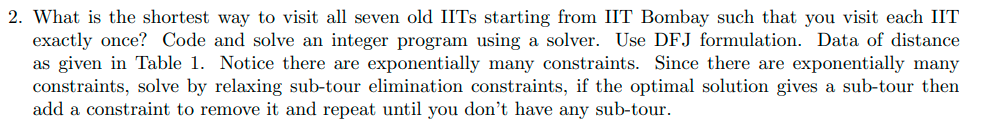

In [5]:
!pip install pulp

In [6]:
!pip install -q pyomo

In [7]:
from pyomo.environ import *

In [8]:
!apt-get install -y -qq glpk-utils

In [10]:
distances = {
    ("Bombay", "Kanpur"): 1289,
    ("Bombay", "Kharakpur"): 1753,
    ("Bombay", "Madras"): 1364,
    ("Bombay", "Delhi"): 1432,
    ("Bombay", "Guwahati"): 2586,
    ("Bombay", "Roorkee"): 1594,
    ("Kanpur", "Kharakpur"): 1167,
    ("Kanpur", "Madras"): 1868,
    ("Kanpur", "Delhi"): 495,
    ("Kanpur", "Guwahati"): 1432,
    ("Kanpur", "Roorkee"): 630,
    ("Kharakpur", "Madras"): 1562,
    ("Kharakpur", "Delhi"): 1567,
    ("Kharakpur", "Guwahati"): 1057,
    ("Kharakpur", "Roorkee"): 1703,
    ("Madras", "Delhi"): 2207,
    ("Madras", "Guwahati"): 2643,
    ("Madras", "Roorkee"): 2343,
    ("Delhi", "Guwahati"): 1891,
    ("Delhi", "Roorkee"): 212,
    ("Guwahati", "Roorkee"): 2055
}

dist_reverse = {}

for key, value in distances.items():
    # Swap the elements in the key tuple to create the reverse key
    reverse_key = (key[1], key[0])
    # Assign the same distance value to the reverse key
    dist_reverse[reverse_key] = value

print(dist_reverse)


{('Kanpur', 'Bombay'): 1289, ('Kharakpur', 'Bombay'): 1753, ('Madras', 'Bombay'): 1364, ('Delhi', 'Bombay'): 1432, ('Guwahati', 'Bombay'): 2586, ('Roorkee', 'Bombay'): 1594, ('Kharakpur', 'Kanpur'): 1167, ('Madras', 'Kanpur'): 1868, ('Delhi', 'Kanpur'): 495, ('Guwahati', 'Kanpur'): 1432, ('Roorkee', 'Kanpur'): 630, ('Madras', 'Kharakpur'): 1562, ('Delhi', 'Kharakpur'): 1567, ('Guwahati', 'Kharakpur'): 1057, ('Roorkee', 'Kharakpur'): 1703, ('Delhi', 'Madras'): 2207, ('Guwahati', 'Madras'): 2643, ('Roorkee', 'Madras'): 2343, ('Guwahati', 'Delhi'): 1891, ('Roorkee', 'Delhi'): 212, ('Roorkee', 'Guwahati'): 2055}


In [11]:
distances.update(dist_reverse)

In [13]:
distances = {
    ("Bombay", "Kanpur"): 1289,
    ("Bombay", "Kharakpur"): 1753,
    ("Bombay", "Madras"): 1364,
    ("Bombay", "Delhi"): 1432,
    ("Bombay", "Guwahati"): 2586,
    ("Bombay", "Roorkee"): 1594,
    ("Kanpur", "Kharakpur"): 1167,
    ("Kanpur", "Madras"): 1868,
    ("Kanpur", "Delhi"): 495,
    ("Kanpur", "Guwahati"): 1432,
    ("Kanpur", "Roorkee"): 630,
    ("Kharakpur", "Madras"): 1562,
    ("Kharakpur", "Delhi"): 1567,
    ("Kharakpur", "Guwahati"): 1057,
    ("Kharakpur", "Roorkee"): 1703,
    ("Madras", "Delhi"): 2207,
    ("Madras", "Guwahati"): 2643,
    ("Madras", "Roorkee"): 2343,
    ("Delhi", "Guwahati"): 1891,
    ("Delhi", "Roorkee"): 212,
    ("Guwahati", "Roorkee"): 2055
}

city_key_mapping = {1: 'Bombay', 2: 'Kanpur', 3: 'Kharakpur', 4: 'Madras', 5: 'Delhi', 6: 'Guwahati', 7: 'Roorkee'}

new_distances = {}

for (city1, city2), distance in distances.items():
    # Get the key values corresponding to the city names
    key1 = next(key for key, value in city_key_mapping.items() if value == city1)
    key2 = next(key for key, value in city_key_mapping.items() if value == city2)
    # Add the distance to the new dictionary with key values
    new_distances[(key1, key2)] = distance

# Print the new distances dictionary
print("New distance",new_distances)

New distance {(1, 2): 1289, (1, 3): 1753, (1, 4): 1364, (1, 5): 1432, (1, 6): 2586, (1, 7): 1594, (2, 3): 1167, (2, 4): 1868, (2, 5): 495, (2, 6): 1432, (2, 7): 630, (3, 4): 1562, (3, 5): 1567, (3, 6): 1057, (3, 7): 1703, (4, 5): 2207, (4, 6): 2643, (4, 7): 2343, (5, 6): 1891, (5, 7): 212, (6, 7): 2055}


In [17]:
dist_reverse = {}

for key, value in new_distances.items():
    # Swap the elements in the key tuple to create the reverse key
    reverse_key = (key[1], key[0])
    # Assign the same distance value to the reverse key
    dist_reverse[reverse_key] = value



In [18]:
new_distances.update(dist_reverse)
import itertools


In [19]:
from pulp import *
cities=[i for i in range(1,8)]

# Create a new minimization problem
model = LpProblem("TSP Problem", LpMinimize)

# Define the decision variables
x = LpVariable.dicts("x", new_distances.keys(), cat=LpBinary)

# Define the objective function
model += lpSum(new_distances[(i, j)] * x[(i, j)] for i, j in new_distances.keys())

# Define the constraints
for cit in cities:
    model += lpSum(x[(i, j)] for i, j in new_distances.keys() if i == cit) == 1
    model += lpSum(x[(i, j)] for i, j in new_distances.keys() if j == cit) == 1

#We have to  start and end at Bombay
model += lpSum(x[(1, j)] for j in cities if j != 1) == 1  # Outgoing edges from Bombay
model += lpSum(x[(i, 1)] for i in cities if i != 1) == 1  # Incoming edges to Bombay

model.solve()

print("Objective Function Value", value(model.objective))
print("||||||||||||||||||||||||||||||||||||||")
vertex=[]
for i,j in new_distances.keys():

    if x[(i, j)].varValue>0:
      vertex.append((i,j))
      print("x[{}, {}] = {}".format(i, j, x[(i, j)].varValue))



Objective Function Value 6179.0
||||||||||||||||||||||||||||||||||||||
x[1, 4] = 1.0
x[2, 5] = 1.0
x[3, 6] = 1.0
x[5, 7] = 1.0
x[4, 1] = 1.0
x[7, 2] = 1.0
x[6, 3] = 1.0


In [20]:
vertices=[]
for key,value in city_key_mapping.items():
  vertices.append(value)

In [21]:
edges=[]

In [23]:
egd=[]
egf=[]
for j in vertex:
  x=j[0]
  y=j[1]
  for i in range(1,8):
    if x==i:
      egd.append(vertices[i-1])
    if y==i:
      egf.append(vertices[i-1])


In [24]:
edge=list(zip(egd,egf))

In [26]:
print("The edges will be",edge)

The edges will be [('Bombay', 'Madras'), ('Kanpur', 'Delhi'), ('Kharakpur', 'Guwahati'), ('Delhi', 'Roorkee'), ('Madras', 'Bombay'), ('Roorkee', 'Kanpur'), ('Guwahati', 'Kharakpur')]


Subtours emerge when constraints are absent, evident in the graph's three distinct loops. To rectify, incorporate subtour constraints to prevent such formations, ensuring a unified, connected structure. This fosters optimal solutions by disallowing fragmented paths, enhancing efficiency and coherence within the system

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges as tuples (u, v)
edges = edge

# Create a graph
G = nx.Graph()

# Add vertices to the graph
G.add_nodes_from(vertices)

# Add edges to the graph
G.add_edges_from(edges)

# Define node positions
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes, seed for reproducibility

# Draw the graph with better node positioning and labels
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=1500, edge_color='k', linewidths=1, font_size=15)

# Show the graph
plt.show()



Subtours manifest without relevant constraints, evident in the graph's three distinct loops. To address, implement subtour constraints, eliminating fragmented paths and fostering system unity. This optimization enhances efficiency and coherence, ensuring a connected structure conducive to optimal solutions within the network

In [29]:
import itertools
from pulp import *

model1 = LpProblem("TSP Problem", LpMinimize)

# Define the decision variables
x1 = LpVariable.dicts("x1", new_distances.keys(), cat=LpBinary)

# Define the objective function
model1 += lpSum(new_distances[(i, j)] * x1[(i, j)] for i, j in new_distances.keys())

# Define the constraints
for cit in cities:
    model1 += lpSum(x1[(i, j)] for i, j in new_distances.keys() if i == cit) == 1
    model1 += lpSum(x1[(i, j)] for i, j in new_distances.keys() if j == cit) == 1

# Start and end at Bombay
model1 += lpSum(x1[(1, j)] for j in cities if j != 1) == 1  # Outgoing edges from Bombay
model1 += lpSum(x1[(i, 1)] for i in cities if i != 1) == 1  # Incoming edges to Bombay


# Sub-tour elimination constraints
for r in range(2, 3):  # considering subsets of cardinality 2 to 3
    for subset in itertools.combinations(cities, r):
        edges_out = [(i, j) for i, j in new_distances.keys() if i in subset and j not in subset]
        #edges_in = [(i, j) for i, j in new_distances.keys() if i not in subset and j in subset]
        model1 += lpSum(x1[edge] for edge in edges_out) >= 1
        #model1 += lpSum(x1[edge] for edge in edges_in) >= 1


# Solve the problem
model1.solve()
vertex2=[]
for i,j in new_distances.keys():

    if x1[(i, j)].varValue>0:
      vertex2.append((i,j))
      print("x[{}, {}] = {}".format(i, j, x1[(i, j)].varValue))

x[1, 5] = 1.0
x[2, 6] = 1.0
x[3, 4] = 1.0
x[5, 7] = 1.0
x[4, 1] = 1.0
x[7, 2] = 1.0
x[6, 3] = 1.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [30]:
egd1=[]
egf1=[]
for j in vertex2:
  a=j[0]
  b=j[1]
  for i in range(1,8):
    if a==i:
      egd1.append(vertices[i-1])
    if b==i:
      egf1.append(vertices[i-1])

In [31]:
edge2=list(zip(egd1,egf1))

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices
vert = vertices

# Define the edges as tuples (u, v)
edges3 = edge2

# Create a directed graph
G1 = nx.DiGraph()

# Add vertices to the graph
G1.add_nodes_from(vert)

# Add edges to the graph
G1.add_edges_from(edges3)

# Ensure BOMBAY is the starting and ending node
start_node = "BOMBAY"
G1.add_edge(start_node, start_node)

# Set positions for nodes
pos = nx.spring_layout(G1)

# Draw the directed graph
nx.draw(G1, pos, with_labels=True, node_color='blue', node_size=1500, edge_color='k', linewidths=1, font_size=15, arrows=True)

# Show the graph
plt.show()



Upon integrating the subtour elimination constraint, an optimal solution emerges. The shortest path covering all points is: starting from node 1, traversing through nodes 5, 7, 2, 6, 3, and 4, and returning to node 1. This path forms a complete loop, efficiently covering all vertices while adhering to the imposed constraint, affirming the optimality of the solution within the network configuration

In [34]:
path=[1,5,7,2,6,3,4,1]
path_with_cities=[]
for j in path:
  path_with_cities.append(vertices[j-1])

In [35]:
pt="->".join(path_with_cities)
print(f"The shortest such path covering all cities is {pt} and\nshortest distance of tour is {value(model1.objective)} kms")

The shortest such path covering all cities is Bombay->Delhi->Roorkee->Kanpur->Guwahati->Kharakpur->Madras->Bombay and
shortest distance of tour is 7689.0 kms


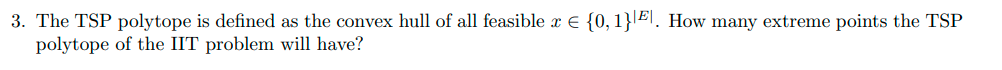


To determine the number of extreme points in the TSP polytope for the given IIT problem with 7 IITs, we calculate permutations of the remaining 6 cities. With 6 cities to permute, there are (n - 1)! possibilities. Substituting n = 7, we find 6!, which equals 720. Hence, the TSP polytope for the 7 IIT problem, including the starting point, comprises 720 extreme points. Each represents a unique arrangement of visiting the IITs, essential for optimizing travel routes and solving the problem efficiently within the polytope framework.
